In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import levene, shapiro
import pandas as df

In [6]:
data = df.read_csv('INF2178_A3_data.csv')

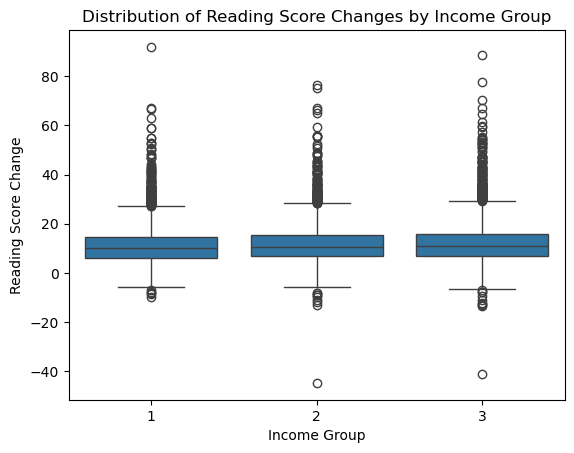

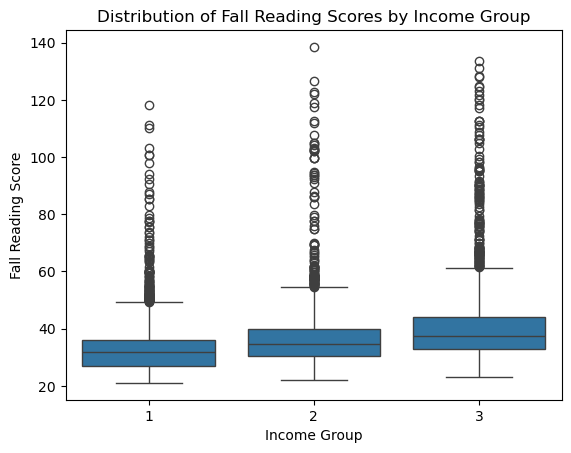

In [8]:
# Calculate the score changes
data['readingscorechange'] = data['springreadingscore'] - data['fallreadingscore']
# Plotting the distribution of reading score improvements by income group
sns.boxplot(x='incomegroup', y='readingscorechange', data=data)
plt.title('Distribution of Reading Score Changes by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Reading Score Change')
plt.show()

# Plotting initial fall reading scores by income group
sns.boxplot(x='incomegroup', y='fallreadingscore', data=data)
plt.title('Distribution of Fall Reading Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Fall Reading Score')
plt.show()


/tmp/ipykernel_116/835569024.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='incomegroup', y='readingscorechange', data=data, join=False)


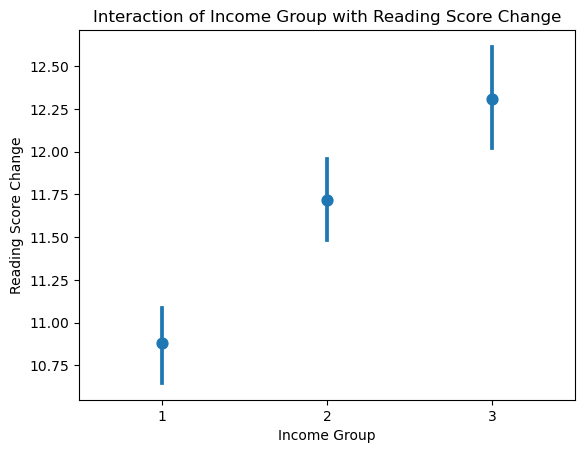

In [9]:
# Interaction plot for reading score change by income group
sns.pointplot(x='incomegroup', y='readingscorechange', data=data, join=False)
plt.title('Interaction of Income Group with Reading Score Change')
plt.xlabel('Income Group')
plt.ylabel('Reading Score Change')
plt.show()

In [10]:
# Testing homogeneity of regression slopes
model_interaction = ols('readingscorechange ~ C(incomegroup) * fallreadingscore', data=data).fit()
sm.stats.anova_lm(model_interaction, typ=2)

,sum_sq,df,F,PR(>F)
C(incomegroup),513.120105,2.0,4.060138,1.727047e-02
fallreadingscore,21099.608888,1.0,333.907533,1.361825e-73
C(incomegroup):fallreadingscore,958.712884,2.0,7.585957,5.099814e-04
Residual,753666.839304,11927.0,NaN,NaN


In [12]:
# Homogeneity of variances
_, pval_levene = levene(data['readingscorechange'][data['incomegroup'] == 1],
                        data['readingscorechange'][data['incomegroup'] == 2],
                        data['readingscorechange'][data['incomegroup'] == 3])

print("Levene's Test p-value:", pval_levene)

# Normality of residuals
model_reading = ols('readingscorechange ~ C(incomegroup) + fallreadingscore', data=data).fit()
_, pval_shapiro = shapiro(model_reading.resid)
print("Shapiro-Wilk Test p-value:", pval_shapiro)

Levene's Test p-value: 2.794929503613517e-09
Shapiro-Wilk Test p-value: 0.0


/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Conducting the ANCOVA for Reading Score Improvement
model_reading = ols('readingscorechange ~ C(incomegroup) + fallreadingscore', data=data).fit()
ancova_reading_results = sm.stats.anova_lm(model_reading, typ=2)
print(ancova_reading_results)

                         sum_sq       df           F        PR(>F)
C(incomegroup)       513.120105      2.0    4.055660  1.734793e-02
fallreadingscore   21099.608888      1.0  333.539242  1.629240e-73
Residual          754625.552188  11929.0         NaN           NaN


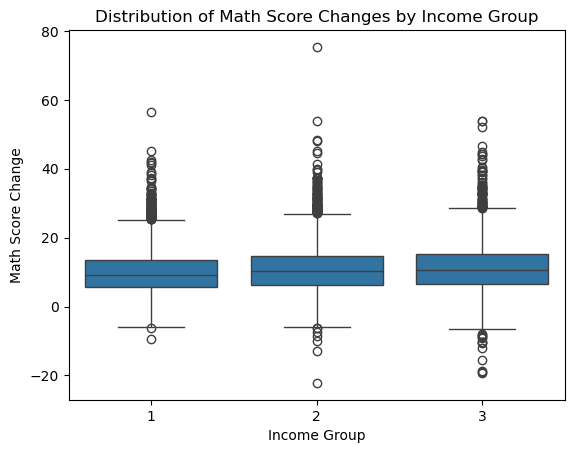

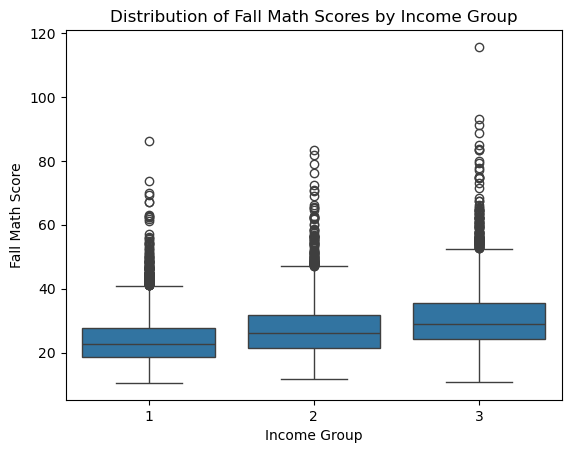

In [14]:
# Calculate the change in math scores from fall to spring
data['mathscorechange'] = data['springmathscore'] - data['fallmathscore']

# Plotting the distribution of math score improvements by income group
sns.boxplot(x='incomegroup', y='mathscorechange', data=data)
plt.title('Distribution of Math Score Changes by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Math Score Change')
plt.show()

# Plotting initial fall math scores by income group
sns.boxplot(x='incomegroup', y='fallmathscore', data=data)
plt.title('Distribution of Fall Math Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Fall Math Score')
plt.show()


/tmp/ipykernel_116/4056302022.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='incomegroup', y='mathscorechange', data=data, join=False)


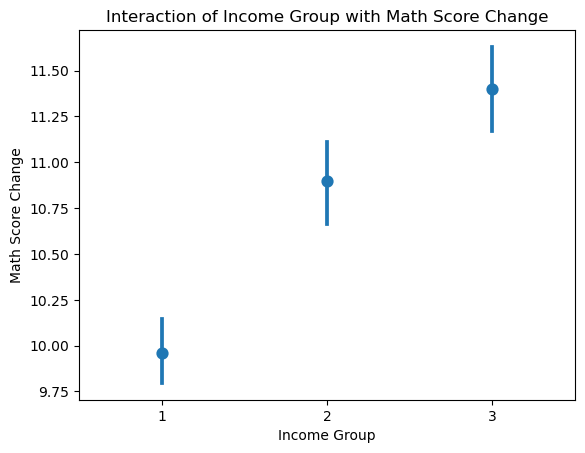

In [15]:
# Interaction plot for math score change by income group
sns.pointplot(x='incomegroup', y='mathscorechange', data=data, join=False)
plt.title('Interaction of Income Group with Math Score Change')
plt.xlabel('Income Group')
plt.ylabel('Math Score Change')
plt.show()

In [16]:
# Testing homogeneity of regression slopes for math scores
model_interaction_math = ols('mathscorechange ~ C(incomegroup) * fallmathscore', data=data).fit()
sm.stats.anova_lm(model_interaction_math, typ=2)

,sum_sq,df,F,PR(>F)
C(incomegroup),1712.758286,2.0,18.576278,8.809765e-09
fallmathscore,4806.990621,1.0,104.271564,2.222228e-24
C(incomegroup):fallmathscore,1656.559052,2.0,17.966751,1.617596e-08
Residual,549842.883064,11927.0,NaN,NaN


In [19]:
# Levene's test for homogeneity of variances for math score changes
pval_levene_math = levene(data['mathscorechange'][data['incomegroup'] == 1],
                             data['mathscorechange'][data['incomegroup'] == 2],
                             data['mathscorechange'][data['incomegroup'] == 3])
print("Levene's Test p-value:", pval_levene_math)
# Shapiro-Wilk test for normality of residuals for the math score model
model_math = ols('mathscorechange ~ C(incomegroup) + fallmathscore', data=data).fit()
pval_shapiro_math = shapiro(model_math.resid)
print("Shapiro-Wilk Test p-value:", pval_shapiro_math)

Levene's Test p-value: LeveneResult(statistic=22.215180179067378, pvalue=2.344180384098772e-10)
Shapiro-Wilk Test p-value: ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)


/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
# Conducting the ANCOVA for Math Score Improvement
ancova_math_results = sm.stats.anova_lm(model_math, typ=2)
print(ancova_math_results)

                       sum_sq       df           F        PR(>F)
C(incomegroup)    1712.758286      2.0   18.523585  9.284861e-09
fallmathscore     4806.990621      1.0  103.975792  2.576573e-24
Residual        551499.442116  11929.0         NaN           NaN
